In [358]:
import pandas as pd
import numpy as np
import seaborn as sns

In [359]:
ds = pd.read_csv(r"C:\Users\user\Downloads\retail_store_inventory.csv")


In [360]:
ds.head(3)

,Date,Product ID,Category,Region,Inventory Level,Units Sold,Price,Holiday/Promotion,Competitor Pricing,Seasonality
0,01-01-2022,P0001,Groceries,North,231,127,33.50,0,29.69,Autumn
1,01-01-2022,P0002,Toys,South,204,150,63.01,0,66.16,Autumn
2,01-01-2022,P0003,Toys,West,102,65,27.99,1,31.32,Summer


In [361]:
ds.drop(columns=["Date"], inplace= True)

In [362]:
ds.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product ID          73100 non-null  object 
 1   Category            73100 non-null  object 
 2   Region              73100 non-null  object 
 3   Inventory Level     73100 non-null  int64  
 4   Units Sold          73100 non-null  int64  
 5   Price               73100 non-null  float64
 6   Holiday/Promotion   73100 non-null  int64  
 7   Competitor Pricing  73100 non-null  float64
 8   Seasonality         73100 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 5.0+ MB


In [363]:
ds.drop_duplicates(ds)

,Product ID,Category,Region,Inventory Level,Units Sold,Price,Holiday/Promotion,Competitor Pricing,Seasonality
0,P0001,Groceries,North,231,127,33.50,0,29.69,Autumn
1,P0002,Toys,South,204,150,63.01,0,66.16,Autumn
2,P0003,Toys,West,102,65,27.99,1,31.32,Summer
3,P0004,Toys,North,469,61,32.72,1,34.74,Autumn
4,P0005,Electronics,East,166,14,73.64,0,68.95,Summer
...,...,...,...,...,...,...,...,...,...
73095,P0016,Furniture,East,96,8,73.73,0,72.45,Winter
73096,P0017,Toys,North,313,51,82.57,0,83.78,Autumn
73097,P0018,Clothing,West,278,36,11.11,0,10.91,Winter
73098,P0019,Toys,East,374,264,53.14,0,55.80,Spring


In [364]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.pipeline import Pipeline ,make_pipeline
from sklearn.ensemble import RandomForestRegressor

In [365]:
le = LabelEncoder()
le.fit_transform(ds["Product ID"])
product =le.fit_transform(ds["Product ID"])

In [366]:
from sklearn.preprocessing import LabelBinarizer
encoder_l = LabelBinarizer()
cat_1hot1 = encoder_l.fit_transform(product)
cat_1hot1

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], shape=(73100, 20))

In [367]:
x = ds.drop("Units Sold",axis=1)           
y = ds["Units Sold"]
                                                

In [368]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 42)

In [369]:
x_train.head()

,Product ID,Category,Region,Inventory Level,Price,Holiday/Promotion,Competitor Pricing,Seasonality
12934,P0015,Clothing,South,316,46.97,0,42.57,Autumn
19473,P0014,Clothing,North,349,11.15,1,8.76,Spring
13001,P0002,Groceries,South,394,53.13,0,53.98,Autumn
26535,P0016,Clothing,East,345,64.31,1,67.48,Autumn
8236,P0017,Groceries,South,209,49.46,0,50.42,Spring


In [370]:
num_col = ["Inventory Level"	,"Price",	"Holiday/Promotion",	"Competitor Pricing"]
cat_col = ["Product ID","Category","Region","Seasonality"]

In [371]:
prepocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(),num_col),
    ("cat", OneHotEncoder(sparse_output= False,), cat_col)
],remainder="drop")

In [372]:
x_train_p = prepocessor.fit_transform(x_train)
x_test_p = prepocessor.transform(x_test)
x_train_p

array([[ 0.31823028, -0.31105217, -0.99359099, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.57233344, -1.6889338 ,  1.00645035, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.91883774, -0.07409654, -0.99359099, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.90608492,  1.43726497, -0.99359099, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.89573746,  0.98335645, -0.99359099, ...,  0.        ,
         0.        ,  0.        ],
       [-1.06778693,  0.64561774, -0.99359099, ...,  0.        ,
         1.        ,  0.        ]], shape=(58480, 37))

In [373]:
x_train_p.shape

(58480, 37)

In [393]:
x_test_p

array([[-0.38247842, -0.56108652,  1.00645035, ...,  0.        ,
         0.        ,  1.        ],
       [-0.57498081, -1.40043262,  1.00645035, ...,  1.        ,
         0.        ,  0.        ],
       [-0.99848607, -1.33580836, -0.99359099, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.0035388 , -0.58147394,  1.00645035, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.67344712, -0.45107141, -0.99359099, ...,  1.        ,
         0.        ,  0.        ],
       [-0.01287383, -0.38413913,  1.00645035, ...,  0.        ,
         0.        ,  1.        ]], shape=(14620, 37))

In [375]:
from sklearn.linear_model import LinearRegression

In [376]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_p, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [377]:
lin_reg.score(x_train_p, y_train),lin_reg.score(x_test_p, y_test)

(0.34901446208825737, 0.3447275036366064)

In [378]:
rd = RandomForestRegressor()
rd.fit(x_train_p, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [379]:
lin_reg.score(x_train_p, y_train),lin_reg.score(x_test_p, y_test)

(0.34901446208825737, 0.3447275036366064)

In [380]:
from sklearn.metrics import mean_absolute_error,r2_score
print(mean_absolute_error(y_test, rd.predict(x_test_p)))
print(r2_score(y_test, rd.predict(x_test_p)))

70.00908686730506
0.30997430293770944


In [381]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rd, x_train_p, y_train, cv=5, n_jobs=-1)

scores

array([0.31204833, 0.30507231, 0.31563349, 0.31241668, 0.3119247 ])

In [382]:
from sklearn.model_selection import GridSearchCV
para = {
    "n_estimators":[100, 200, 300],
    "max_depth" :[3,5,10],
    "min_samples_split" :[2,5,8]
 
}
Grid =GridSearchCV(
    rd,
    param_grid=para,
    cv=3,
    n_jobs=-1)

In [383]:
Grid.fit(x_train_p, y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [3, 5, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [384]:
Grid.score(x_train_p, y_train), Grid.score(x_test_p, y_test)

(0.352462937608638, 0.3437264146474568)

In [385]:
Grid.best_score_

np.float64(0.3478125256026902)

In [388]:
y_pred =Grid.predict(x_test_p)

In [387]:
y_test

66127    138
43485    105
34304     70
34317    105
38631     76
        ... 
8251      58
50745    346
50634    346
23941    225
64694    194
Name: Units Sold, Length: 14620, dtype: int64

In [389]:
print(y_pred[:5])

[114.72139167 102.28748105  73.50286913 180.77133358  70.21924374]


--- Top 10 Predictions Comparison ---
       Actual Units Sold  Predicted Units Sold  Difference (Error)
66127                138                114.72               23.28
43485                105                102.29                2.71
34304                 70                 73.50               -3.50
34317                105                180.77              -75.77
38631                 76                 70.22                5.78
42111                206                163.18               42.82
63601                 87                 59.01               27.99
30662                 53                234.75             -181.75
21439                129                 64.99               64.01
12107                 55                 64.91               -9.91


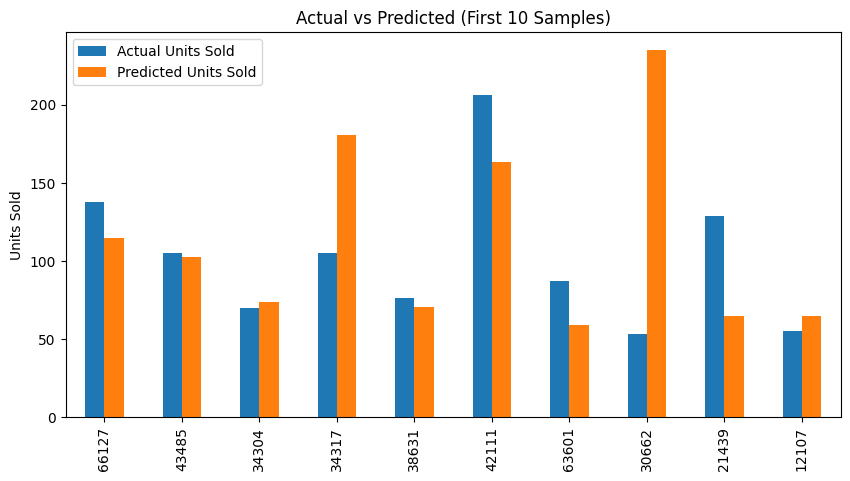

In [391]:
import pandas as pd

y_pred = Grid.predict(x_test_p)

comparison_df = pd.DataFrame({
    'Actual Units Sold': y_test[:10],
    'Predicted Units Sold': y_pred[:10].round(2),
    'Difference (Error)': (y_test[:10] - y_pred[:10]).round(2)
})

print("--- Top 10 Predictions Comparison ---")
print(comparison_df)

import matplotlib.pyplot as plt

comparison_df[['Actual Units Sold', 'Predicted Units Sold']].plot(kind='bar', figsize=(10,5))
plt.title('Actual vs Predicted (First 10 Samples)')
plt.ylabel('Units Sold')
plt.show()